# Виконання

## Завдання четверте

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mall_data = pd.read_csv('data/Mall_Customers.xls')
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
109,110,Male,66,63,48
124,125,Female,23,70,29
72,73,Female,60,50,49
137,138,Male,32,73,73
85,86,Male,48,54,46
66,67,Female,43,48,50
152,153,Female,44,78,20
119,120,Female,50,67,57
12,13,Female,58,20,15
147,148,Female,32,77,74


## KMEANS

### Натренуємо модель.

In [39]:
from sklearn.cluster import KMeans
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_

/home/sideshowbobgot/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Тренування моделі*

### Зобразимо кластери.

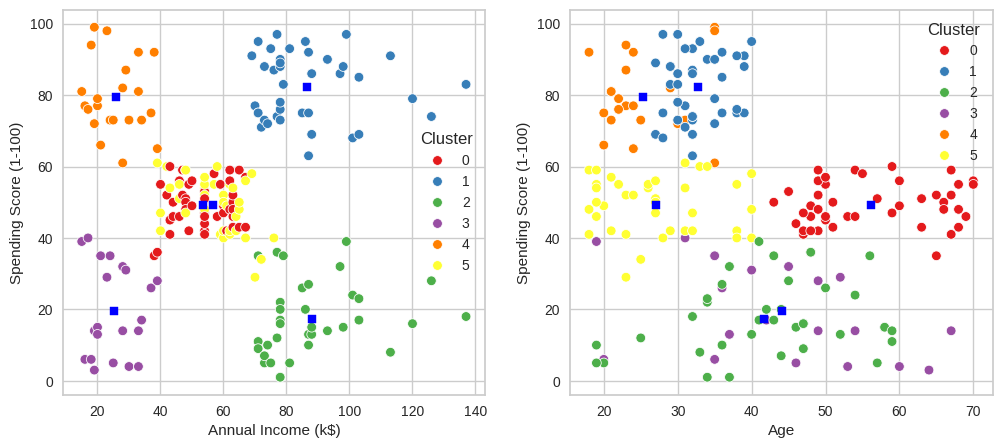

In [40]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(KM6_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(KM6_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

*KMEANS кластери*

### Зобразимо Silhouette Coefficient.

/home/sideshowbobgot/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


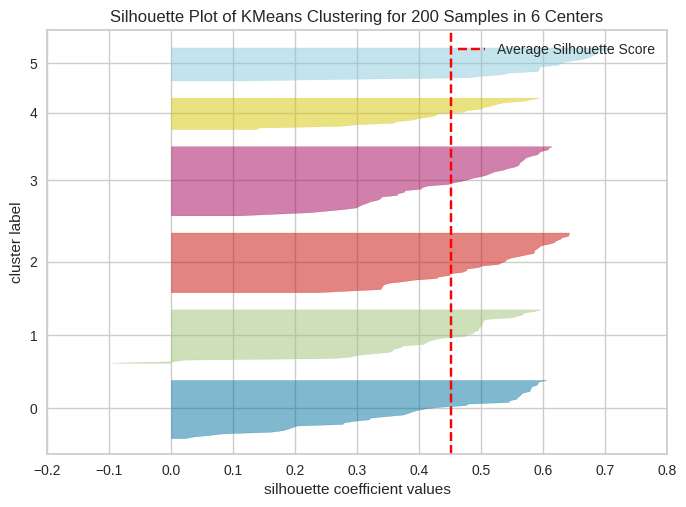

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

*Графік Silhouette Coefficient*

### Покажемо розміри кластерів.

In [42]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,45
1,39
2,35
3,21
4,22
5,38


*KMEANS розміри кластерів*

## Affinity Propagation

### Натренуємо модель.

In [43]:
from sklearn.cluster import AffinityPropagation
AF = AffinityPropagation(preference=-11800).fit(X_numerics)
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

*Тренування Affinity Propagation*

### Покажемо розміри кластерів.

In [44]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


*Affinity Propagation розміри кластерів*

### Зобразимо кластери.

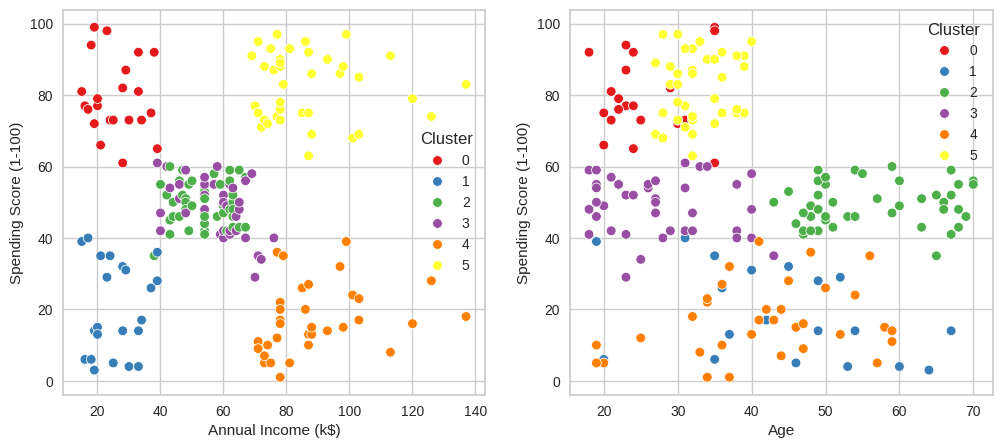

In [45]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot(AF_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
sns.scatterplot(AF_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')
plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

*Affinity Propagation кластери*

## DBSCAN

### Натренуємо модель.

In [46]:
from sklearn.cluster import DBSCAN
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

*Тренування DBSCAN*

### Покажемо розміри кластерів.

In [47]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


*DBSCAN розміри кластерів*

### Зобразимо кластери.

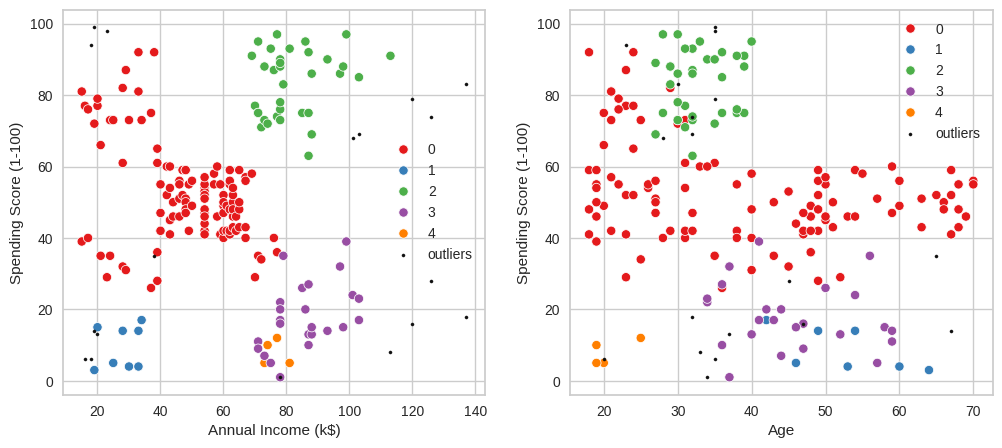

In [48]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], 
                x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

*DBSCAN кластери*

## Порівняння результатів

### Як бачимо, що K-Means та Affinity Propagation створили шість доволі помірних різних кластерів.

In [49]:
clusters = pd.concat([KM6_clust_sizes, AF_clust_sizes],axis=1, sort=False)

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

for (name, pred) in [('KMEANS', KM_6_clusters.labels_), ('Affinity Propagation', AF.labels_)]:
    print(f'ARI {name}: {adjusted_rand_score(DBS_clustering.labels_, pred)}')
    print(f'NMI {name}: {normalized_mutual_info_score(DBS_clustering.labels_, pred)}')
    
clusters

ARI KMEANS: 0.3651876127340171
NMI KMEANS: 0.5792304844451788
ARI Affinity Propagation: 0.367842274887852
NMI Affinity Propagation: 0.5863552685455267


,KM_size,AF_size
Cluster,,
0,45,22
1,39,22
2,35,44
3,21,39
4,22,34
5,38,39


*Результати*